# Project 3: Reddit Posts Classification

## NoteBook Contents
- Part 1 - Extraction, Cleansing
- Part 2 - EDA, Pre-Proccessing, and Modeling

----------------------------------------

### Part 2 - EDA, Pre-Proccessing, and Modeling

In [ ]:
#libraries

#################################
import folium
import glob
import html
import imp
import ipywidgets as widgets
import json
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import pandas as pd
import pandas_datareader as pdr
import pickle
import plotly
import plotly.express as px
import random as rand
import re
import requests
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import spacy
import statsmodels.api as sm
import streamlit as st
import sympy as sy
import time

#######################
from alpha_vantage.timeseries import TimeSeries
from bs4 import BeautifulSoup
from category_encoders import OneHotEncoder as OHE
from IPython.display import display
from IPython.display import HTML
#from ipywidgets import *
from ipywidgets import interact
from math import pi
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from pandas import DataFrame
from pandas import Series
from pandas import json_normalize
from pathlib import Path
#from plotter import SVMPlotter
from random import sample
from scipy.stats import ttest_ind
from statsmodels.discrete.discrete_model import Logit
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.weightstats import DescrStatsW
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#######################
from sklearn import svm
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.datasets.samples_generator import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingClassifier
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.inspection import plot_partial_dependence
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.svm import SVC

In [3]:
#pull back in model-ready DataFrame
final_df = pd.read_csv('../datasets/final_df.csv', keep_default_na=False, index_col=0)

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5608 entries, 4 to 96
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               5608 non-null   object
 1   author              5608 non-null   object
 2   selftext            5608 non-null   object
 3   subreddit           5608 non-null   object
 4   score               5608 non-null   int64 
 5   created_utc         5608 non-null   int64 
 6   id                  5608 non-null   object
 7   is_fantasyfootball  5608 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 394.3+ KB


In [5]:
final_df.head(5)

,title,author,selftext,subreddit,score,created_utc,id,is_fantasyfootball
4,NFL Divisional Round Rankings,DailyRotoHelp,These rankings are as of Friday morning. Most ...,fantasyfootball,2,1610737970,ky1i88,1
15,Survey on effects of Fantasy sports' advertisi...,2facecm,With the increase of visibility of fantasy lea...,fantasyfootball,1,1610727617,kxxsqg,1
25,"Official: [Index] - Fri , 01/15/2021",FFBot,___\r\n\r\n###**PLEASE READ**\r\n\r\n* How to ...,fantasyfootball,1,1610712196,kxt84d,1
26,Official: [Simple Questions and League Issues]...,FFBot,"**DO NOT post Who Do I Start, Add Drop, or Tra...",fantasyfootball,1,1610712172,kxt7vp,1
27,"Official: [Keeper] - Fri , 01/15/2021",FFBot,"**Post your ""Who Do I Keep?"" questions here ra...",fantasyfootball,1,1610712168,kxt7tx,1


In [6]:
#check for NULLs again - removed in extraction notebook so shouldn't be any
final_df.isnull().sum()

title                 0
author                0
selftext              0
subreddit             0
score                 0
created_utc           0
id                    0
is_fantasyfootball    0
dtype: int64

In [7]:
final_df.describe()

,score,created_utc,is_fantasyfootball
count,5608.000000,5.608000e+03,5608.000000
mean,1.127675,1.603496e+09,0.302425
std,1.458943,6.703103e+06,0.459349
min,0.000000,1.584106e+09,0.000000
25%,1.000000,1.599408e+09,0.000000
50%,1.000000,1.605934e+09,0.000000
75%,1.000000,1.609009e+09,1.000000
max,67.000000,1.610748e+09,1.000000


In [8]:
#FOR EDA purposes, split back up merged DataFrame by subreddit to analyze posts independently
fantasyfootball = pd.DataFrame(final_df[final_df['is_fantasyfootball'] == 1])

2021-01-22 09:32:41.069 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [9]:
fantasyfootball.head(2)

,title,author,selftext,subreddit,score,created_utc,id,is_fantasyfootball
4,NFL Divisional Round Rankings,DailyRotoHelp,These rankings are as of Friday morning. Most ...,fantasyfootball,2,1610737970,ky1i88,1
15,Survey on effects of Fantasy sports' advertisi...,2facecm,With the increase of visibility of fantasy lea...,fantasyfootball,1,1610727617,kxxsqg,1


In [10]:
dailyfantasysports = pd.DataFrame(final_df[final_df['is_fantasyfootball'] == 0])

In [11]:
dailyfantasysports.head(2)

,title,author,selftext,subreddit,score,created_utc,id,is_fantasyfootball
0,What does this mean?,TheRegal6,I got an email saying “We just need you to wri...,dfsports,1,1610747631,ky4uur,0
1,BEST DraftKings &amp; FanDuel NBA DFS Core 4 P...,dfsndonuts,Tonight’s Best [DraftKings and FanDuel NBA DFS...,dfsports,2,1610743477,ky3erf,0


In [12]:
#instantiate CountVectorizer
cv = CountVectorizer(stop_words='english', max_features = 500)

In [13]:
#fit & transform CountVectorizer on post field, create new temp DataFrame
cv_ff = cv.fit_transform(fantasyfootball['selftext'])

In [14]:
#create new DataFrame as an array containing max feature counts per word, per post
cvff_df = pd.DataFrame(cv_ff.toarray(),columns=cv.get_feature_names())
cvff_df

,01,02,03,04,05,06,07,08,09,10,...,wrs,www,x200b,yahoo,yard,yards,year,years,yes,zeke
0,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,2,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1693,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


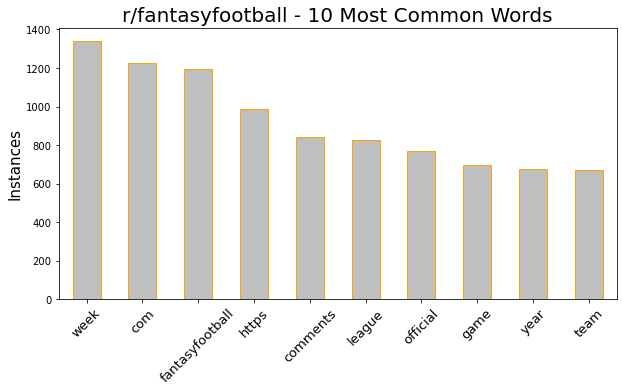

In [15]:
#make horizontal bar plot reflecting top 10 words that occur most for the posts

cvff_df.sum().nlargest(10).plot(kind ='bar', figsize=(10,5), color=(0.5, 0.5, 0.5, 0.5), edgecolor='Orange')
plt.title("r/fantasyfootball - 10 Most Common Words", size = 20)
plt.xticks(size = 13, rotation = 45)
plt.ylabel("Instances", size = 15)
plt.yticks(size = 10);

fantasyfootball subreddit is by week while dailyfantasysports subreddit is by day; given the word "week" is the most common for fantasyfootball is a good sign regarding distinguishing posts.

It's also a good sign the subbreddit name itself "fantastfootball" is the third highest occurring word.

In [16]:
#repeat the above steps for the other subreddit; dailyfantasysports

In [17]:
#instantiate CountVectorizer
cv = CountVectorizer(stop_words='english', max_features = 500)

In [18]:
#fit & transform CountVectorizer on post field, create new temp DataFrame
cv_dff = cv.fit_transform(dailyfantasysports['selftext'])

In [19]:
#create new DataFrame as an array containing max feature counts per word, per post
cvdff_df = pd.DataFrame(cv_dff.toarray(),columns=cv.get_feature_names())
cvdff_df

,00,000,01,04,07,08,09,10,100,11,...,wrs,www,x200b,yards,year,years,yesterday,youtu,youtube,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3908,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3910,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,3,0


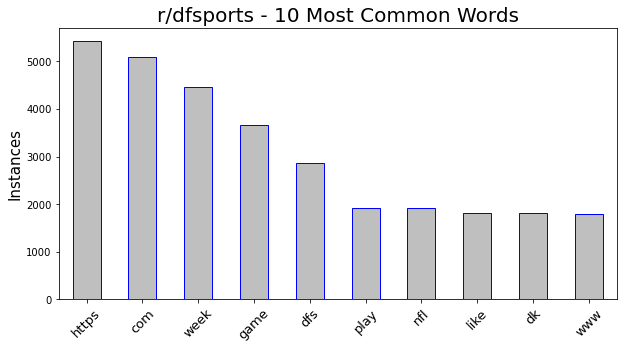

In [20]:
#make horizontal bar plot reflecting top 10 words that occur most for the posts

cvdff_df.sum().nlargest(10).plot(kind ='bar', figsize=(10,5), color=(0.5, 0.5, 0.5, 0.5), edgecolor='Blue')
plt.title("r/dfsports - 10 Most Common Words", size = 20)
plt.xticks(size = 13, rotation = 45)
plt.ylabel("Instances", size = 15)
plt.yticks(size = 10);

As mentioned above, fantasyfootball subreddit is by week while dailyfantasysports subreddit is by day; it's not a good sign that "week" is the third most common for dailyfantasysports regarding distinguishing posts.

fantasyfootball subreddit is focused on football only while dailyfantasysports subreddit contains content on multiple sports; it's not a good sign that "nfl" (National Football League) is the seventh most common word for dailyfantasysports and no other professional sports league are listed in the top 10.

------------------------------------

#### Modeling

In [21]:
#reset the index after removing a bunch of dirty data (empty, [deleted], [removed] posts) from the original data frame
final_df.reset_index(drop=True, inplace=True)

In [22]:
final_df.head(1)

,title,author,selftext,subreddit,score,created_utc,id,is_fantasyfootball
0,NFL Divisional Round Rankings,DailyRotoHelp,These rankings are as of Friday morning. Most ...,fantasyfootball,2,1610737970,ky1i88,1


##### 1. Logistic Regression Model

In [23]:
#instantiate CountVectorizer
cv = CountVectorizer(stop_words = 'english', max_features = 500)

In [24]:
#instantiate StandardScaler
    #set the mean equal to false due to the fact that we're dealing with sparse matrices
    #source = https://stackoverflow.com/questions/57349987/standardscaler-difference-between-with-std-false-or-true-and-with-mean-false

ss = StandardScaler(with_mean = False)

In [25]:
#instantiate LogisticRegression
logreg = LogisticRegression(max_iter = 5000)

In [26]:
#set X & Y
X = final_df['selftext']
y = final_df['is_fantasyfootball']

In [27]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)

In [28]:
#create pipeline to chain together CountVectorizer, StandardScaler, LogisticRegression
pipe = make_pipeline(cv,ss,logreg)

In [29]:
#fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=500, stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(max_iter=5000))])

In [30]:
#score train
pipe.score(X_train, y_train)

0.9640989063242986

In [31]:
#score test
pipe.score(X_test, y_test)

0.9087018544935807

In [32]:
#cross validate to determine accuracy of pipeline - kFold utilized to generate multiple groups of sample data to test on
#source: https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/

kfold = KFold(n_splits = 10, random_state = 7)
results = cross_val_score(pipe, X_test, y_test, cv = kfold)

/Users/colinmondi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
#cross_val score
print(results.mean())

0.8708763931104357


In [34]:
#generate predictions
preds = pipe.predict(X_test)

In [35]:
#RMSE
mean_squared_error(y_test,preds,squared=False)

0.3021558298401992

In [36]:
#create confusion matrix
cm = confusion_matrix(y_test,preds)
cm

array([[923,  55],
       [ 73, 351]])

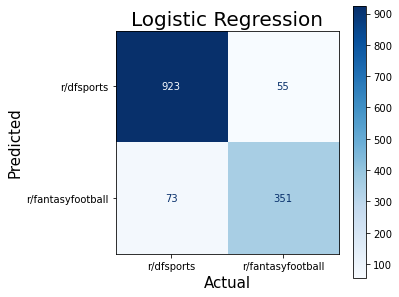

In [37]:
#confusion matrix displaying actual vs. predicted
fig,ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(pipe, X_test, y_test, display_labels=['r/dfsports','r/fantasyfootball'], ax = ax, cmap=plt.cm.Blues)
plt.title('Logistic Regression', size = 20)
plt.xlabel("Actual", size = 15)
plt.ylabel("Predicted", size = 15);

Daily Fantasy Sports - 916 correct predictions, 78 incorrect

Fantasy Football - 346 correct predictions, 62 incorrect

In [38]:
#coefficient weights - determine how individual words impacted model performance
#source: https://stackoverflow.com/questions/33657809/calculate-weighted-average-with-pandas-dataframe

coefs = pipe.named_steps['logisticregression'].coef_[0]

In [39]:
words = pipe.named_steps['countvectorizer'].get_feature_names()

In [40]:
coefs_words = pd.DataFrame({'coefs': coefs,'word': words})
coefs_words.head(5)

,coefs,word
0,-0.810180,00
1,-1.423661,000
2,-0.809533,01
3,0.054151,04
4,0.395456,06


In [41]:
coefs_words_l = coefs_words.nlargest(15,'coefs')
coefs_words_l

,coefs,word
149,1.693093,fantasyfootball
295,1.673373,opponent
23,1.647265,2021
226,1.237693,league
16,1.182983,17
383,1.178920,season
333,1.146365,ppr
15,1.110461,16
53,1.079691,accurate
227,1.013172,leagues


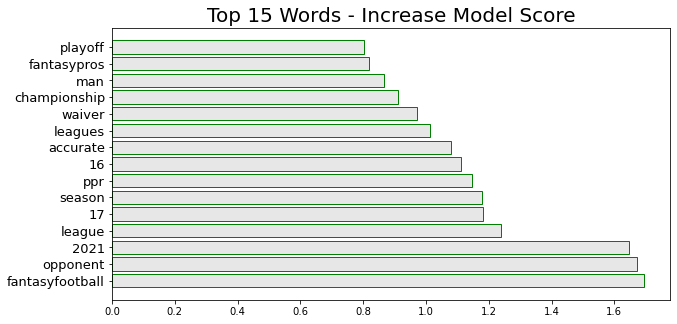

In [42]:
plt.figure(figsize=(10,5))
plt.barh(coefs_words_l.word, coefs_words_l.coefs, color=(0.1, 0.1, 0.1, 0.1), edgecolor='Green')
plt.title('Top 15 Words - Increase Model Score', size = 20)
plt.xticks(size = 10)
plt.yticks(size = 13);

In [43]:
coefs_words_s = coefs_words.nsmallest(15,'coefs')
coefs_words_s

,coefs,word
147,-3.743485,fanduel
120,-3.209922,dfs
278,-2.712070,nba
235,-2.076463,lineups
127,-2.048621,dk
135,-2.005875,draftkings
204,-1.978102,https
399,-1.857759,slate
179,-1.600903,gpp
406,-1.554415,stack


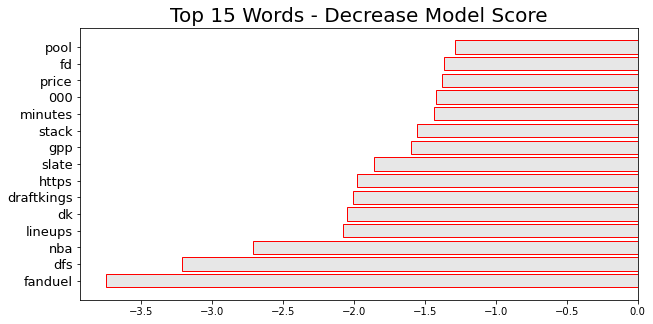

In [44]:
plt.figure(figsize=(10,5))
plt.barh(coefs_words_s.word, coefs_words_s.coefs, color=(0.1, 0.1, 0.1, 0.1), edgecolor='Red')
plt.title('Top 15 Words - Decrease Model Score', size = 20)
plt.xticks(size = 10)
plt.yticks(size = 13);

##### 2. Naive Bayes Model

In [45]:
#instantiate MultinomialNB
nb = MultinomialNB()

In [46]:
#instantiate CountVectorizer
cv = CountVectorizer(stop_words = 'english', max_features = 500)

In [47]:
#set X & Y
X2 = final_df['selftext']
y2 = final_df['is_fantasyfootball']

In [48]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=123, stratify=y2)

In [49]:
#create pipeline to chain CountVectorizer, MultinomialNB
pipe2 = make_pipeline(cv,nb)

In [50]:
#fit pipeline
pipe2.fit(X2_train, y2_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=500, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [51]:
#score train
pipe2.score(X2_train, y2_train)

0.9113171659534

In [52]:
#score test
pipe2.score(X2_test, y2_test)

0.891583452211127

In [53]:
#cross validate to determine accuracy of pipeline - kFold utilized to generate multiple groups of sample data to test on
#source: https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/

kfold = KFold(n_splits = 10, random_state = 7)
results = cross_val_score(pipe2, X2_test, y2_test, cv = kfold)

/Users/colinmondi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [54]:
#cross_val score
print(results.mean())

0.8637689969604863


In [55]:
#generate predictions
preds2 = pipe2.predict(X2_test)

In [64]:
#genenrate variables for evaluation metrics
tn, fp, fn, tp = confusion_matrix(y2_test, preds2).ravel()

In [65]:
#define metrics
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Sensitivity = tp / (tp + fn)
Specificity = tn / (tn + fp)

In [66]:
Accuracy

0.891583452211127

In [67]:
Sensitivity

0.7641509433962265

In [68]:
Specificity

0.9468302658486708

In [56]:
#RMSE
mean_squared_error(y2_test,preds2,squared=False)

0.32926668186877495

In [57]:
#create confusion matrix
cm2 = confusion_matrix(y2_test,preds2)
cm2

array([[926,  52],
       [100, 324]])

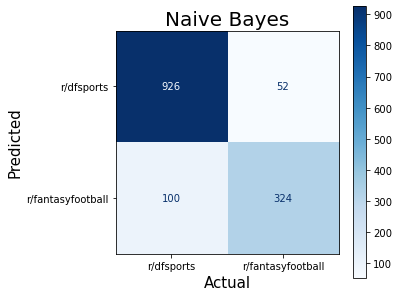

In [58]:
#confusion matrix displaying actual vs. predicted
fig,ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(pipe2, X2_test, y2_test, display_labels=['r/dfsports','r/fantasyfootball'], ax = ax, cmap=plt.cm.Blues)
plt.title('Naive Bayes', size = 20)
plt.xlabel("Actual", size = 15)
plt.ylabel("Predicted", size = 15);

Daily Fantasy Sports - 926 correct predictions, 95 incorrect

Fantasy Football - 329 correct predictions, 52 incorrect

-----------------------

#### NOTES - Comparing Logistic Regression vs. Naive Bayes

##### *** KEY NOTICE - the model stats listed below are slightly different than the outputs listed in the cells above because I reran the entire notebook end-to-end once more before submitting, but no additional changes were made to the model logic / data.




Logistic Regression had slightly better scores regarding R-squared (0.90 vs 0.89) and RMSE (0.31 vs 0.32).

Logistic Regression is overfit due to the higher train score (0.96) in comparison to both the test score (0.90) and cross val score (0.86).

Naive Bayes has almost identical train, test, and cross val scores (~0.89) indicating the model is neither overfit/underfit.

Confusion Matrix Interpretation:
Both models had a higher accuracy rate (% of correct predictions vs % of incorrect predictions) on average for Daily Fantasy Sports (90 % correct, both models) in comparison to Fantasy Football (85 % correct, both models):

- Comparing individual model accuracy rates for Daily Fantasy Sports: Logistic Regression is higher
- Comparing individual model accuracy rates for Fantasy Football: Naive Bayes is higher

- Comparing difference in accuracy rates across both models, both subredits: Naive Bayes is more balanced

Logistic Regression
- Daily Fantasy Sports: 92% correct, 8% incorrect
- Fantasy Football: 84% correct, 16% incorrect

Logistic Regression: 8% difference (92% correct for Daily Fantasy Sports, 84% correct for Fantasy Football)

Naive Bayes
- Daily Fantasy Sports: 90% correct, 10% incorrect
- Fantasy Football: 87% correct, 13% incorrect

Naive Bayes: 3% difference (90% correct for Daily Fantasy Sports, 87% correct for Fantasy Football)

#### For Reference - Model Definitions

Naive Bayes - "It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature."

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Logistic Regression - "Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables."

https://www.statisticssolutions.com/what-is-logistic-regression/

-----------------------

#### Conclusions

Both models successfully predicted the correct subreddit a post originated from for majority of instances. Although the Logistic Regression model has slightly better R-squared score and RMSE value, the difference in both scores is too close to draw any conclusions. But the train, test, and cross validation scores indicate overfitting for the Linear Regression Model, while this is not the case for the Naive Bayes model. Given this I believe the Naive Bayes model is the better model to use for the problem at hand.